<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), Data Scientist at Mail.Ru Group <br>
Translated and edited by Christina Butsko, Inga Kaydanova, Artem Trunov, [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), Anastasia Manokhina, and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) 

# <center>Topic 2. Visual data analysis in Python
## <center>Part 2. Example of Visual Data Analysis

### Article outline

1. Dataset
2. Visual data exploration and analysis
2. Peeking into n-dimensional space with t-SNE
3. Useful resources

### 1. Dataset

In the first article, we looked at the data on customer churn for a telecom operator. Let’s load that dataset into a `DataFrame` again. But, before we do that, let's perform our usual initialization:

In [1]:
# Do our usual environment setup
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')

Let’s make sure everything has been parsed correctly by looking at the first 5 entries using `head()`.

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let's verify the numbers of rows (customers) and columns (features) using `shape`:

In [4]:
df.shape

(3333, 20)

Let’s make sure that there are no missing values and that each feature (i.e. column) contains exactly 3333 entries.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Here is the description of our features:

|  Name  | Description | Type |
|---         |--:       |     |
| **State** | State abbreviation (like KS = Kansas) | categorical |
| **Account length** | How long the client has been with the company | numerical |
| **Area code** | Phone number prefix | numerical  |
| **International plan** | International plan (on/off) | binary |
| **Voice mail plan** | Voicemail (on/off) | binary |
| **Number vmail messages** | Number of voicemail messages | numerical |
| **Total day minutes** |  Total duration of daytime calls | numerical |
| **Total day calls** | Total number of daytime calls  | numerical |
| **Total day charge** | Total charge for daytime services | numerical |
| **Total eve minutes** | Total duration of evening calls | numerical |
| **Total eve calls** | Total number of evening calls | numerical |
| **Total eve charge** | Total charge for evening services | numerical |
| **Total night minutes** | Total duration of nighttime calls | numerical |
| **Total night calls** | Total number of nighttime calls | numerical |
| **Total night charge** | Total charge for nighttime services | numerical |
| **Total intl minutes** | Total duration of international calls  | numerical |
| **Total intl calls** | Total number of international calls | numerical |
| **Total intl charge** | Total charge for international calls | numerical |
| **Customer service calls** | Number of calls to customer service | numerical |

The last data column, **Churn**, is our target variable. It is binary: $1$ indicates that that the company eventually lost this customer, and $0$ indicates that the customer was retained. Later, we will build models that predict this variable based on the remaining features. This is why we call it a *target*.

### 2. Visual data exploration and analysis

Let’s look at the distribution of the target variable, the churn rate.

In [6]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

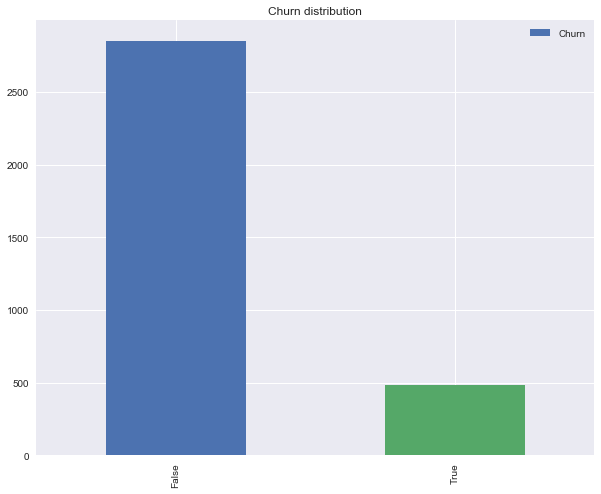

In [7]:
# Set the default figure size
pylab.rcParams['figure.figsize'] = (10, 8)

df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Churn distribution');

Let’s divide all the feature variables (i.e. every column except *Churn*) into the following groups:

- *binary*: International plan, Voice mail plan;
- *categorical*: State;
- *ordinal*: Customer service calls;
- *numerical*: everything else.

Next, we will look at the correlations among the numerical variables. From the colored correlation matrix generated below, we can see that there are 4 variables such as *Total day charge* that have been directly calculated from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out as they do not contribute any additional information.

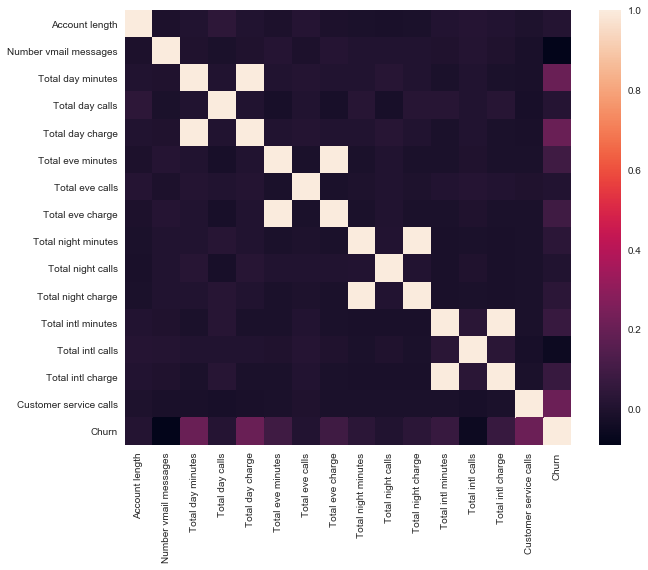

In [8]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
sns.heatmap(corr_matrix);

Now, let's take a look at the distributions of the remaining numerical variables. We will explore the binary, categorical, and ordinal variables separately.

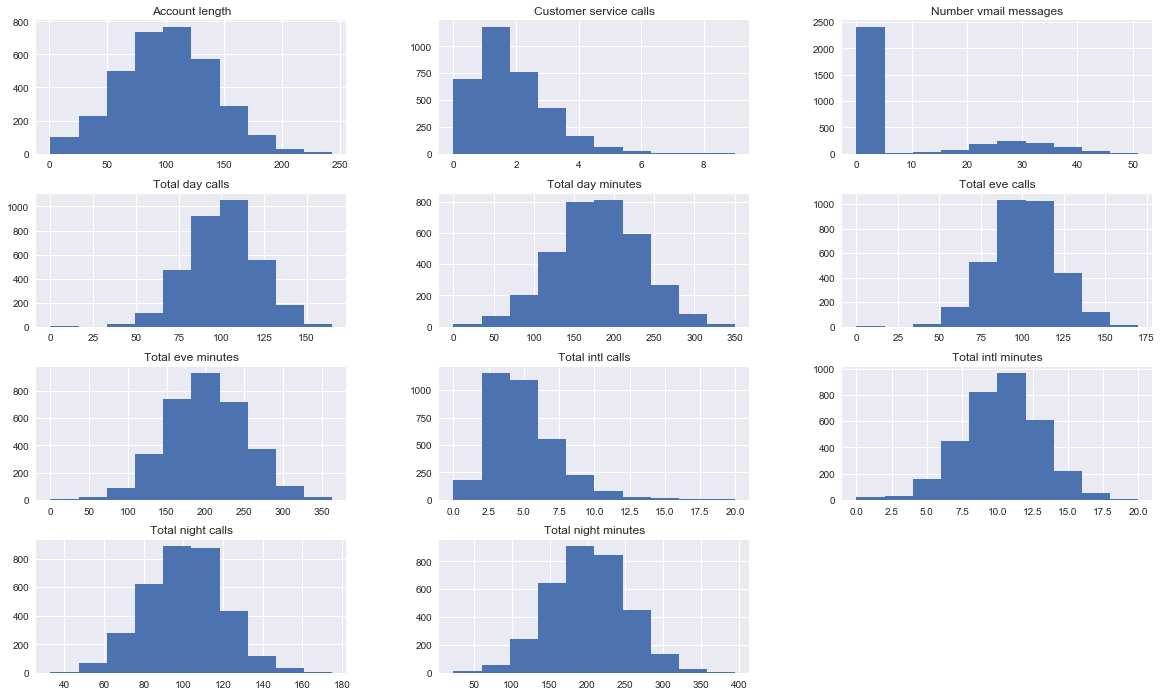

In [9]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                       'Total day charge',   'Total eve charge',   'Total night charge',
                                       'Total intl charge', 'Churn']))
df[features].hist(figsize=(20,12));

We can see that most of the variables are normally distributed. Few exceptions are *Customer service calls* (the Poisson distribution would be more appropriate here) and the number of voice messages (*Number vmail messages* peaks at zero, which corresponds to those who have their voicemail disabled). Also, the distribution of the number of international calls (*Total intl calls*) is skewed to the left.

It may be useful to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of distinct variables fill the rest of the matrix. Sometimes, such visualization may help draw conclusions about data, but, in our case, everything is pretty clear with no surprises.

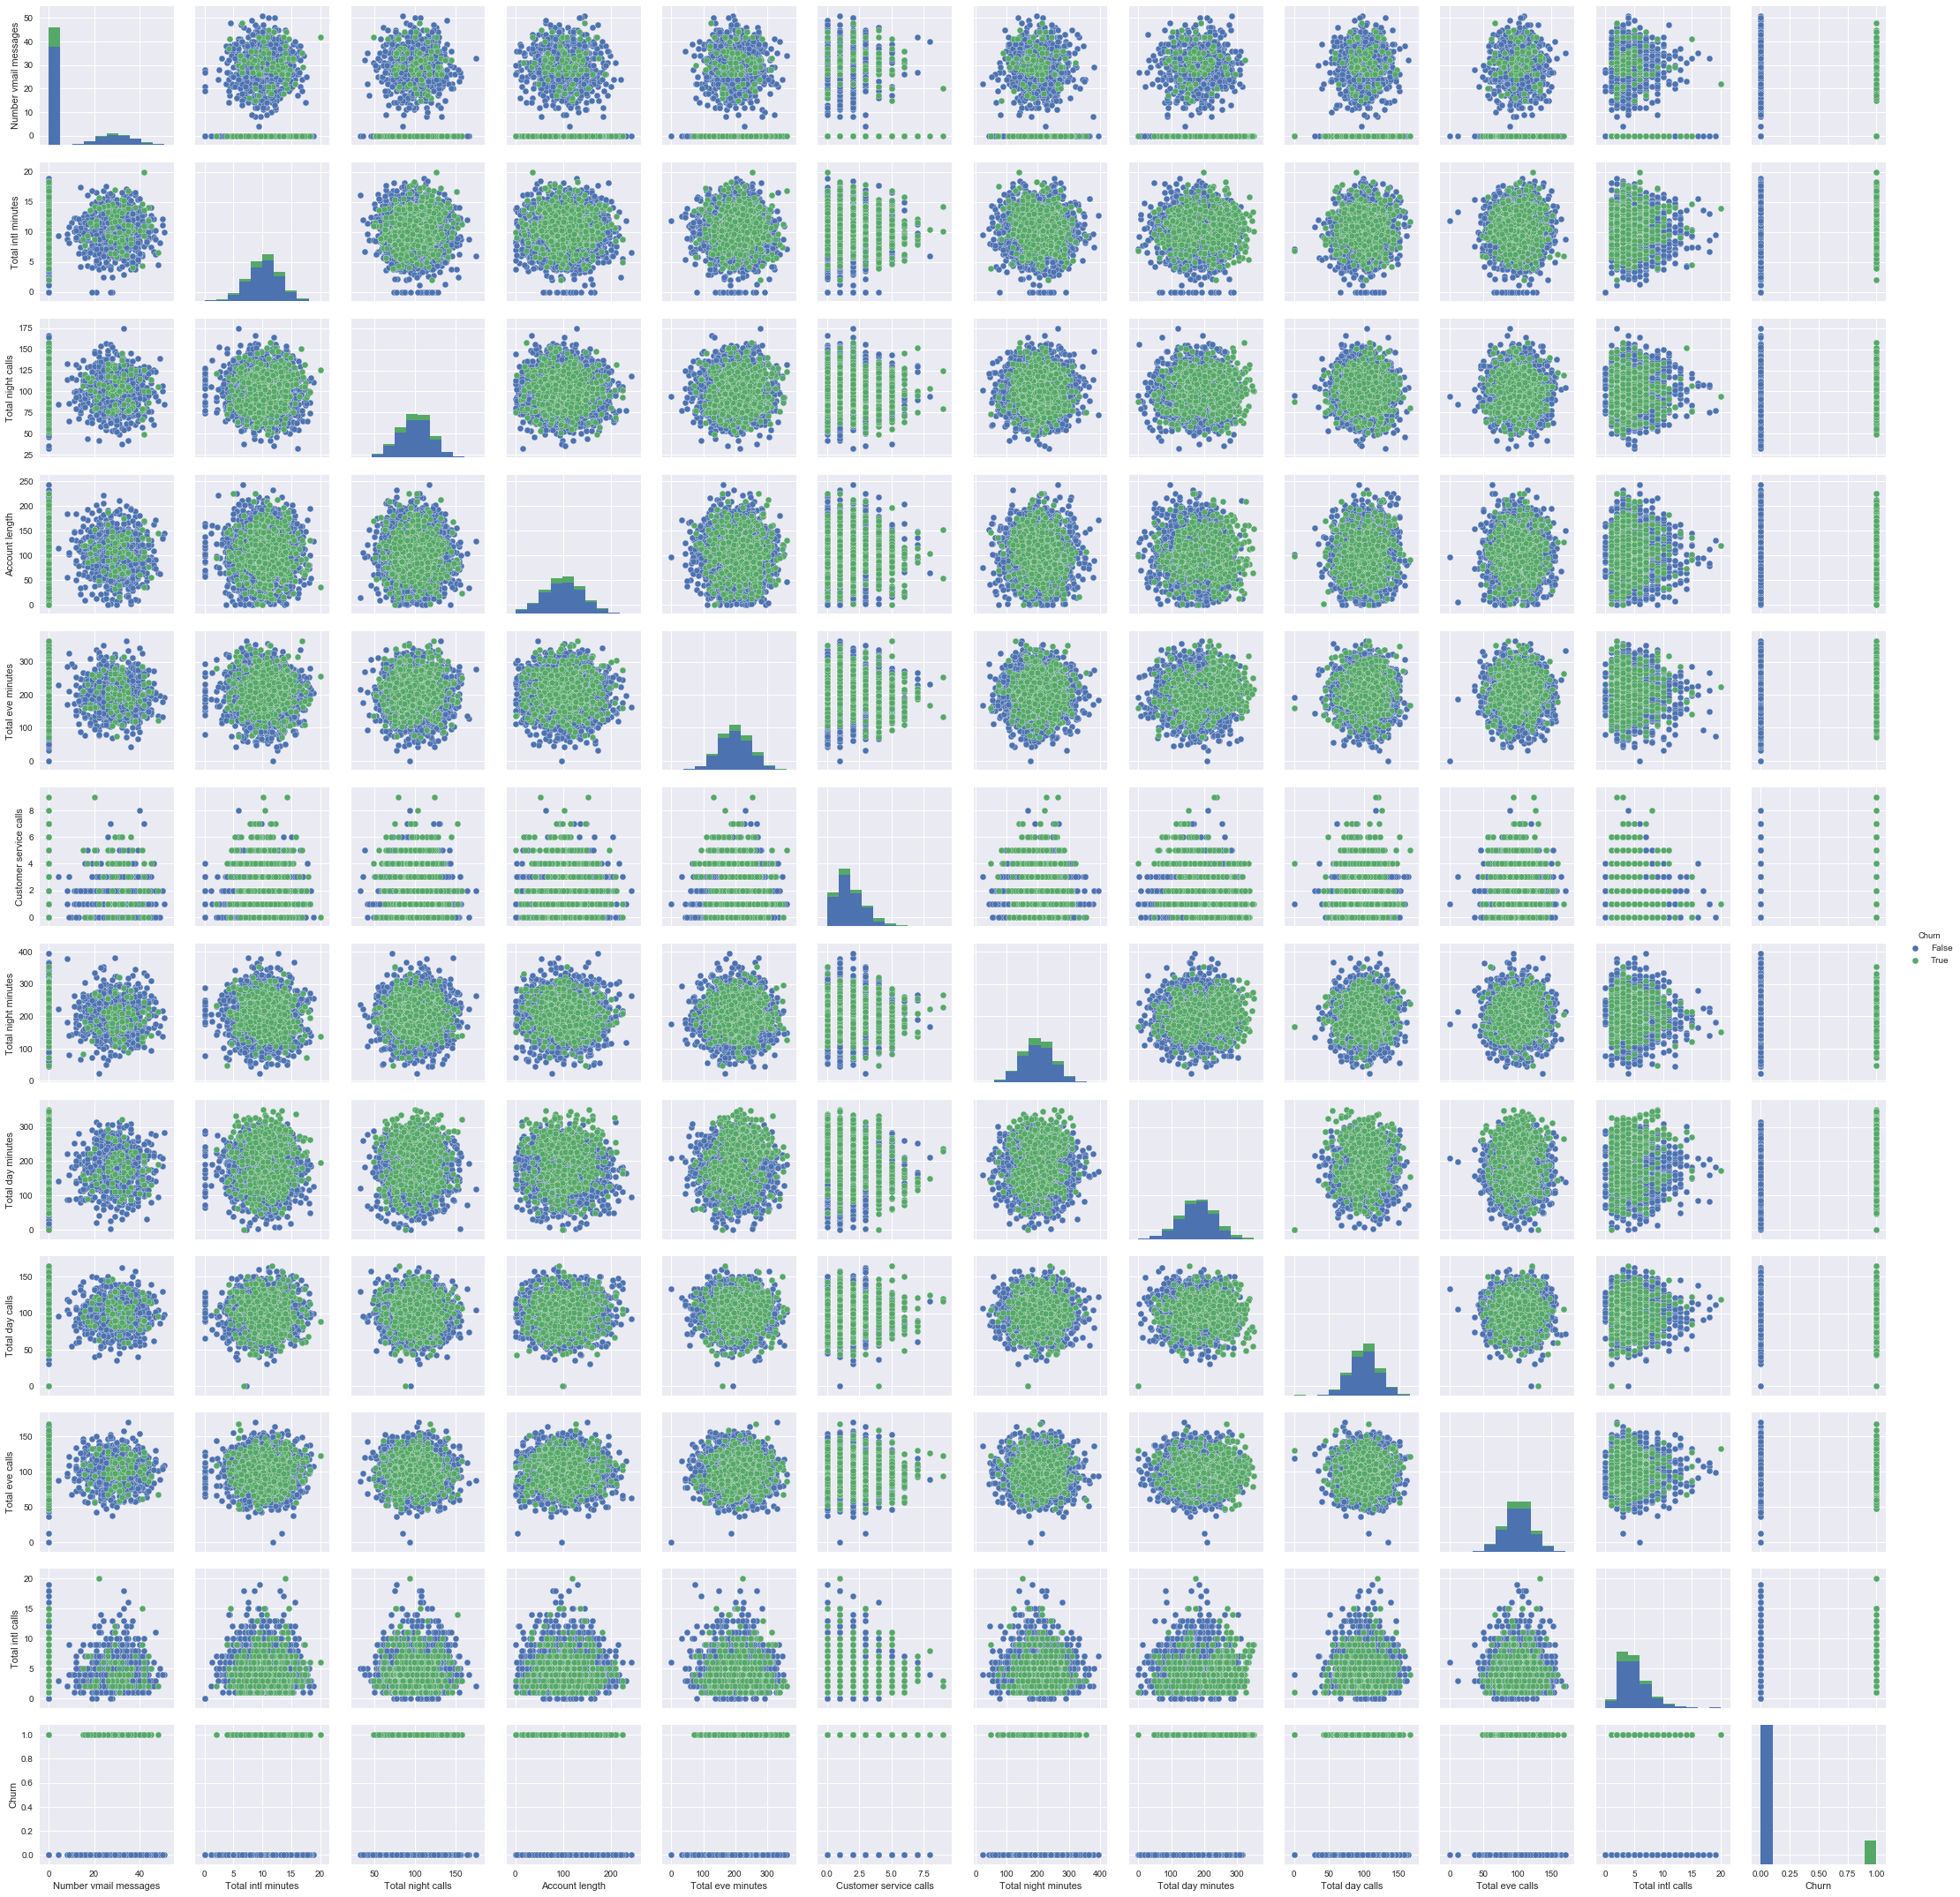

In [10]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

#### How the input variables are related to the target variable *Churn*

Let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers and those who left.

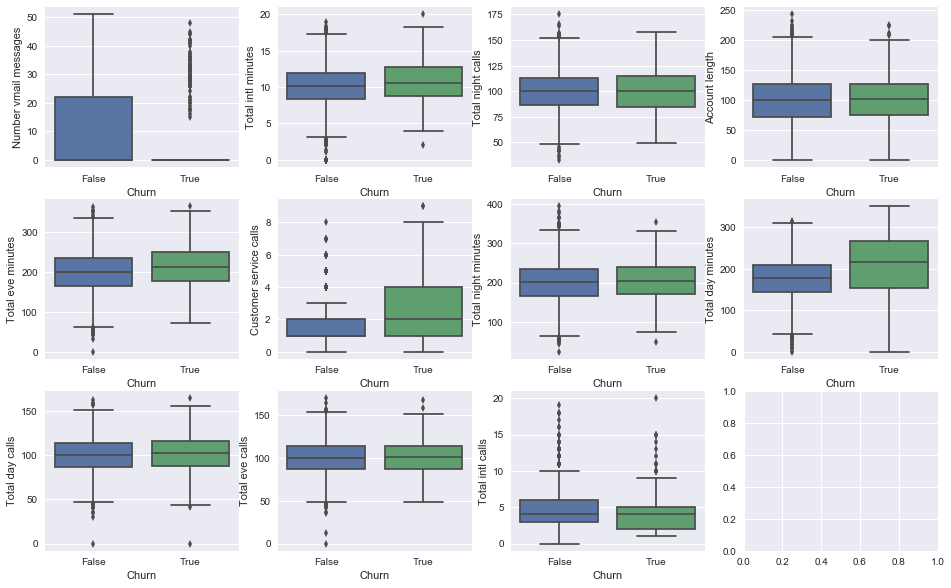

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: *Total day minutes*, *Customer service calls*, and *Number vmail messages*. Later in this course, we will learn how to determine the feature importance in classification using *Random Forest* or *Gradient Boosting*; there, we will see that the first two of these features are indeed very important for churn prediction.

Let's look separately at the distribution of the number of day minutes spoken for the loyal and disloyal customers. On the left, we see our familiar box plots. To the right, there is a *violin plot* with two smoothed histograms, one for each of the two customer groups, displaying the distribution for *Total day minutes*. In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone.

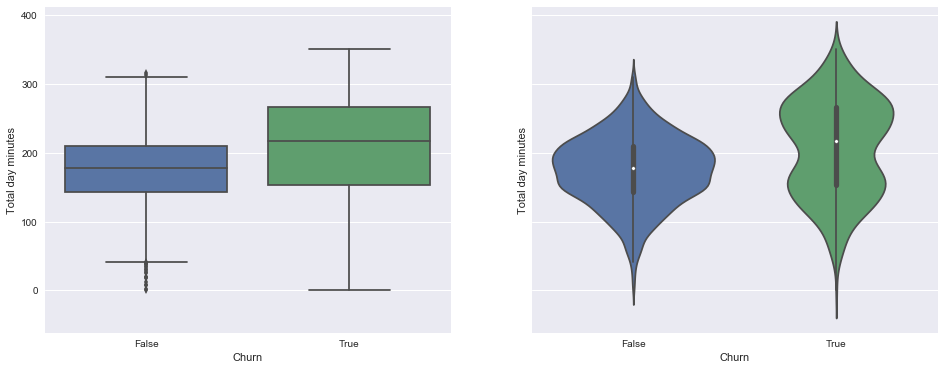

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

**An interesting observation**: on average, customers that discontinue their contracts use the communication services more actively. Perhaps they are unhappy with the tariffs; so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

Let’s now plot the distribution of the number of calls to the customer service (we already created such a plot in the first article). This variable has few unique values and thus can be considered either numerical or ordinal. We can depict the distribution more clearly using a *count plot*. **An observation**: the churn rate increases significantly with 4 or more calls to customer service.

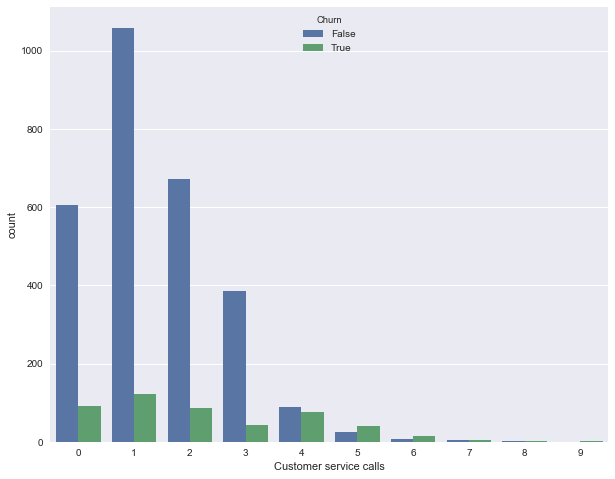

In [13]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Now, let's look at the relationship between churn and the binary features, *International plan* and *Voice mail plan*.

**An observation**: when *International Plan* is enabled, the churn rate is much higher, that is to say that the usage of the international plan by the customer is a strong feature. We do not see the same with *Voice mail plan*.

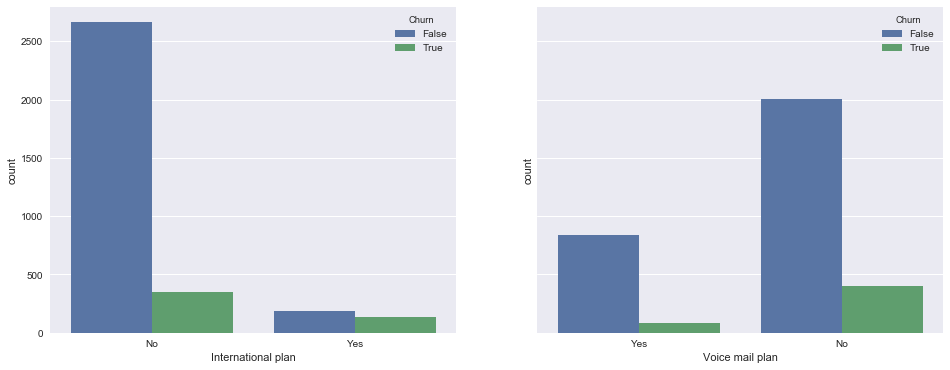

In [14]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

Finally, let's try and see how the categorical variable *State* is related to churn. First, we will build a summary table:

In [15]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


This feature is not so easy to work with since the number of states is rather high: 51. Also, we see that there are not a lot of data points for each individual state: only 3 to 17 customers in each state abandoned the operator.

Next, we calculate the churn rate for each state and sort from high to low:

In [16]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,MT,AR,KS,NY,MN,PA,MA,CT,NC,NH,GA,DE,OK,OR,UT,CO,KY,SD,OH,FL,IN,ID,WY,MO,VT,AL,NM,ND,WV,TN,DC,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,0.205882,0.2,0.185714,0.180723,0.178571,0.177778,0.169231,0.162162,0.161765,0.160714,0.148148,0.147541,0.147541,0.141026,0.138889,0.136364,0.135593,0.133333,0.128205,0.126984,0.126761,0.123288,0.116883,0.111111,0.109589,0.1,0.096774,0.096774,0.09434,0.09434,0.092593,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


At first glance, it seems like the churn rate in New Jersey and California are above 25% and less than 5% in Hawaii and Alaska. But, as a matter of fact, these conclusions are based on too few observations and could be a property of the whole of the available data. We could test the [Matthews](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) and [Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) correlation hypotheses, but this would be beyond the scope of this article.

All in all, we should not include the variable *State* in classification models because of the risk of *overfitting* – we will get back to these concepts with *cross-validation*, stay tuned!

### 3. Peeking into n-dimensional space with t-SNE

Let’s create a [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) representation of the same churn data. The name of the method looks complex and a bit intimidating: *t-distributed Stohastic Neighbor Embedding*. Its math is also impressive (we will not delve into it, but, if you feel brave, here is the [original article](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) by Laurens van der Maaten and Geoffrey Hinton from [JMLR](http://www.jmlr.org/)). Its basic idea is simple: find a projection of a high-dimensional feature space onto a plane (or in 3D, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space would end up farther apart on the plane. Those that were originally close would remain close to each other. Essentially, *neighbor embedding* is a search for a new and less-dimensional data representation that preserves elements that are neighbors.

Let's practice. We will leave out the *State* and *Churn* features and convert the values "Yes"/"No" of the binary features into numbers using [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html). We also normalize the data: subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.

In [17]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [18]:
# Convert the binary features to numbers and leave out 'State'
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, build a t-SNE representation:

In [19]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 1min 31s, sys: 7.22 s, total: 1min 38s
Wall time: 1min 38s


and plot it:

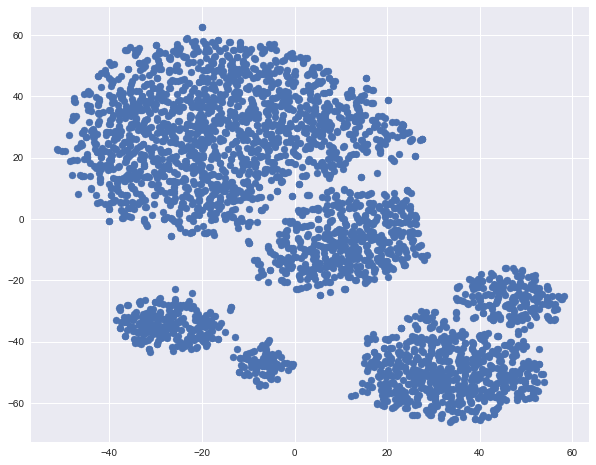

In [20]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

Let’s color this t-SNE representation according to the churn (green for loyal customers, and red for those who left).

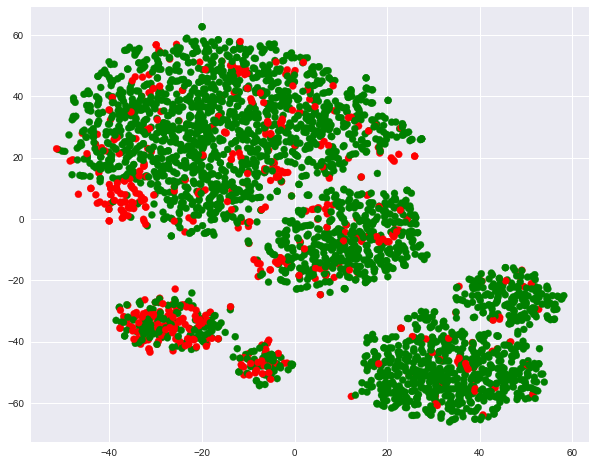

In [21]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],
            c=df['Churn'].map({False: 'green', True: 'red'}));

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

To better understand the picture, we can also color it with the remaining binary features: *International Plan* and *Voicemail*. The green dots here indicate the objects that are positive for the corresponding binary feature.

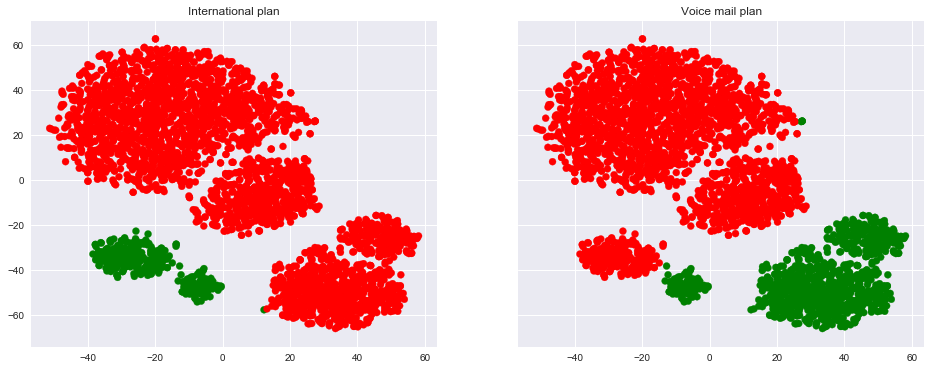

In [22]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'green', 'No': 'red'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'green', 'No': 'red'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');

Now it is clear that, for example, many dissatisfied customers who churn are crowded together in the most south-western cluster that represents the people with the international plan but no voice mail.

Finally, let's note some disadvantages of t-SNE:
- High computational complexity. The [implementation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) in `scikit-learn` is unlikely to be feasible in a real task. In the case of large samples, you should try [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE) instead.
- The plot can change a great deal with a change in the random seed, which complicates interpretation. [Here](http://distill.pub/2016/misread-tsne/) is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such pictures because it can be equivalent to plain guessing. Of course, some findings in t-SNE pictures may inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Occasionally, using t-SNE, you can get a really good intuition for the data. An example is shown for handwritten digits; [here](https://colah.github.io/posts/2014-10-Visualizing-MNIST/) is a good paper about this.

<img src='../../img/tsne_mnist.png' />

### 4. Useful resources

- The [official documentation](http://seaborn.pydata.org/api.html) and the [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn`.
- To work with `plotly`, start with the official website: the [reference documentation](https://plot.ly/python/reference/) and lots of [explained examples](https://plot.ly/python/).